# IMPORTAÇÃO DAS BIBLIOTECAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [3]:
data = pd.read_excel("Dataset - Code Challenge Data Scientist.xlsx")
print('Este dataset possui %s linhas e %s colunas' % (data.shape[0], data.shape[1]))

Este dataset possui 4972 linhas e 11 colunas


# ENTENDIMENTO DOS DADOS

In [4]:
data.head()

,ID,GEO_REFERENCIA,DATA_NASCIMENTO,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL
0,1,780,1992-08-15,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A
1,2,35,1990-02-24,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A
2,3,54,1987-07-17,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A
3,4,35,1988-04-27,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A
4,5,883,1971-12-10,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 11 columns):
ID                 4972 non-null int64
GEO_REFERENCIA     4972 non-null int64
DATA_NASCIMENTO    4972 non-null datetime64[ns]
PROFISSAO          4972 non-null object
GENERO             4972 non-null object
ESTADO_CIVIL       4972 non-null object
VALOR_01           4972 non-null float64
VALOR_02           4972 non-null float64
VALOR_03           4972 non-null float64
VALOR_04           4972 non-null float64
PERFIL             4972 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 427.4+ KB


# VARIÁVEIS CATEGORICAS

In [6]:
data["DATA_NASCIMENTO"].describe()
# NECESSIDADE DE CRIAÇÃO DAS VARIÁVEIS MÊS, ANO E IDADE

count                    4972
unique                   3982
top       1977-01-05 00:00:00
freq                        5
first     1925-11-03 00:00:00
last      2016-08-01 00:00:00
Name: DATA_NASCIMENTO, dtype: object

In [7]:
data["PERFIL"].describe()

count     4972
unique       4
top          A
freq      3489
Name: PERFIL, dtype: object

In [8]:
data["PROFISSAO"].describe()
# NECESSIDADE DE REDISTRIBUIÇÃO, MUITAS CATEGORIAS

count                     4972
unique                      79
top       ANALISTA DE SISTEMAS
freq                       564
Name: PROFISSAO, dtype: object

In [9]:
data["ESTADO_CIVIL"].describe()
# POSSIBILIDADE DE REDISTRIBUIÇÃO DAS CATEGORIAS, CATEGORIAS PARECIDAS

count            4972
unique              8
top       SOLTEIRO(A)
freq             2584
Name: ESTADO_CIVIL, dtype: object

In [10]:
data["GENERO"].describe()

count     4972
unique       2
top          M
freq      3865
Name: GENERO, dtype: object

# VARIÁVEIS CONTÍNUAS

In [11]:
data["GEO_REFERENCIA"].describe()

count    4972.000000
mean      336.807522
std       300.711983
min        10.000000
25%        70.000000
50%       224.000000
75%       607.000000
max       999.000000
Name: GEO_REFERENCIA, dtype: float64

In [12]:
data["VALOR_01"].describe()
# PRESENÇA DE OUTLIERS

count      4972.000000
mean       2022.698192
std        6098.823138
min           0.000000
25%         628.571429
50%        1371.428571
75%        2571.428571
max      400000.000000
Name: VALOR_01, dtype: float64

In [13]:
data["VALOR_02"].describe()
# PRESENÇA DE OUTLIERS

count    4.972000e+03
mean     1.863806e+04
std      8.918084e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.005771e+03
max      2.857143e+06
Name: VALOR_02, dtype: float64

In [14]:
data["VALOR_03"].describe()
# PRESENÇA DE OUTLIERS

count    4.972000e+03
mean     4.246265e+03
std      3.764594e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.428571e+06
Name: VALOR_03, dtype: float64

In [15]:
data["VALOR_04"].describe()
# PRESENÇA DE OUTLIERS

count      4972.000000
mean       5041.123332
std       23246.036503
min           0.000000
25%           0.000000
50%           0.000000
75%        1428.571429
max      685714.285714
Name: VALOR_04, dtype: float64

# EXCLUSÃO E CRIAÇÃO DE VARIÁVEIS

In [16]:
data1 = data.copy()
data1["ANO"] = list(map(lambda var: var.date().year,data1["DATA_NASCIMENTO"]))

In [17]:
data1 = data1.drop(["ID","DATA_NASCIMENTO"],axis=1)
data1.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO
0,780,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A,1992
1,35,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A,1990
2,54,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A,1987
3,35,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A,1988
4,883,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A,1971


In [18]:
data1["ESTADO_CIVIL"].value_counts()
    

SOLTEIRO(A)                                    2584
CASADO(A) COM BRASILEIRO(A) NATO(A)            1870
UNIAO ESTAVEL                                   267
DIVORCIADO(A)                                   164
VIUVO(A)                                         35
CASADO(A) COM ESTRANGEIRO(A)                     20
DESQUITADO(A)                                    19
CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)      13
Name: ESTADO_CIVIL, dtype: int64

In [19]:
def estadocivil(var):
    if var == "SOLTEIRO(A)":
        return "SO"
    else:
        return "NSO"
    
data1["ESTADO_CIVIL"]=list(map(estadocivil,data1["ESTADO_CIVIL"]))
data1["ESTADO_CIVIL"].value_counts()

SO     2584
NSO    2388
Name: ESTADO_CIVIL, dtype: int64

In [20]:
def idade(var):
    idade = datetime.now().year-var
    if idade < 18:
        return "inf"
    elif idade >= 18 and idade <30:
        return "30"
    elif idade >= 30 and idade < 35:
        return "35"
    elif idade >= 35 and idade < 40:
        return "40"
    elif idade >= 40:
        return "40+"
    else:
        return var
    
data1["FAIXA_ETARIA"]=list(map(idade,data1["ANO"]))
# REMOÇÃO DE CRIANÇAS DA BASE
data1 = data1[data1["FAIXA_ETARIA"] != "inf"]
data1["FAIXA_ETARIA"].value_counts()

40+    1457
35     1267
30     1255
40      971
Name: FAIXA_ETARIA, dtype: int64

# RECATEGORIZAR VARIÁVEIS (PROFISSÃO E ESTADO CÍVIL)

In [21]:
def outras(var):
    if var in lista:
        return "OUTROS"
    else:
        return var

In [22]:
data2 = data1.copy()

freq_profissoes = data2['PROFISSAO'].value_counts()
lista = freq_profissoes[freq_profissoes<np.abs(freq_profissoes.mean()-1*freq_profissoes.std())]
lista

ECONOMISTA                                            51
PROFESSOR DE ENSINO SUPERIOR                          42
TRABALHADOR METALÚRGICO E SIDERÚRGICO                 41
BOLSISTA                                              41
PROPRIETARIO DE MICROEMPRESAS                         40
FUNCIONÁRIO PÚBLICO CIVIL APOSENTADO                  34
DIRETOR DE EMPRESAS                                   30
JORNALISTA                                            28
ARQUITETO                                             27
ODONTÓLOGO E DENTISTA                                 27
ENFERMEIRO E NUTRICIONISTA                            26
PROPRIETÁRIO DE ESTABELECIMENTO COMERCIAL             25
ELETRICISTA E ASSEMELHADOS                            25
FARMACÊUTICO                                          24
PILOTO DE AERONAVES                                   22
PSICÓLOGO                                             21
VETERINÁRIO E ZOOTECNISTA                             19
PROPRIETÁRIO DE ESTABELECIMENTO

In [23]:
data2['PROFISSAO'] = list(map(outras,data2['PROFISSAO']))
data2['PROFISSAO'].value_counts()

OUTROS                                         818
ANALISTA DE SISTEMAS                           563
ENGENHEIRO                                     505
ADMINISTRADOR                                  441
ESTUDANTE                                      390
SERVIDOR PÚBLICO FEDERAL                       279
AUTÔNOMO                                       269
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS          215
SERVIDOR PÚBLICO ESTADUAL                      211
EMPRESÁRIO                                     164
MÉDICO                                         157
MILITAR EM GERAL                               123
ADVOGADO                                       119
BANCARIO E ECONOMIÁRIO                         113
SERVIDOR PÚBLICO MUNICIPAL                     108
APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)         93
CONTADOR                                        87
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA     81
PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS           79
TÉCNICO DE ELETRICIDADE        

In [24]:
data2.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO,FAIXA_ETARIA
0,780,ANALISTA DE SISTEMAS,M,SO,342.857143,342.857143,428.571429,28.571429,A,1992,30
1,35,SERVIDOR PÚBLICO ESTADUAL,F,SO,942.857143,0.000000,0.000000,0.000000,A,1990,30
2,54,ANALISTA DE SISTEMAS,M,SO,2000.000000,0.000000,0.000000,2857.142857,A,1987,35
3,35,BANCARIO E ECONOMIÁRIO,M,NSO,857.142857,285.714286,0.000000,1428.571429,A,1988,35
4,883,SERVIDOR PÚBLICO MUNICIPAL,M,NSO,8615.385714,0.000000,0.000000,47471.788571,A,1971,40+


# FAZER ANÁLISE DE OUTLIERS

In [25]:
data4 = data2.copy()

def outliers(var):
    if np.abs(var-variavel.mean())<=0.5*variavel.std():
        return var
    else:
        return variavel.mean()

In [26]:
# VALOR_01
variavel = data4["VALOR_01"]
data4["VALOR_01"] = list(map(outliers,variavel))
data4["VALOR_01"].describe()

count    4950.000000
mean     1559.022139
std      1098.977454
min         0.000000
25%       628.571429
50%      1400.000000
75%      2075.775000
max      5040.000000
Name: VALOR_01, dtype: float64

In [27]:
# VALOR_02
variavel = data4["VALOR_02"]
variavel = list(map(outliers,variavel))
data4["VALOR_02"] = variavel
data4["VALOR_02"].describe()

count     4950.000000
mean      5962.601528
std      11698.939313
min          0.000000
25%          0.000000
50%          0.000000
75%       6043.160000
max      63225.928571
Name: VALOR_02, dtype: float64

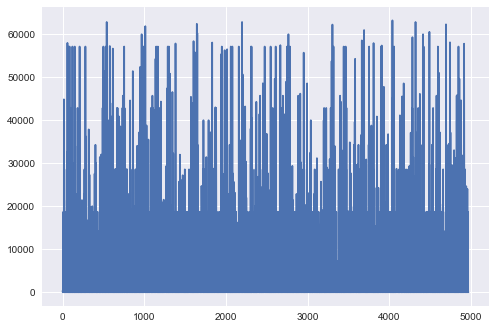

In [28]:
plt.plot(data4["VALOR_02"])

In [29]:
# VALOR_03
variavel = data4["VALOR_03"]
variavel = list(map(outliers,variavel))
data4["VALOR_03"] = variavel
data4["VALOR_03"].describe()

count     4950.000000
mean       793.078400
std       2674.402312
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      22857.142857
Name: VALOR_03, dtype: float64

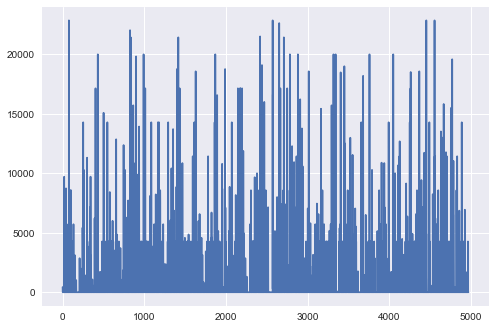

In [30]:
plt.plot(data4["VALOR_03"])

In [31]:
# VALOR_04
variavel = data4["VALOR_04"]
variavel = list(map(outliers,variavel))
data4["VALOR_04"] = variavel
data4["VALOR_04"].describe()

count     4950.000000
mean      1568.685446
std       3195.588682
min          0.000000
25%          0.000000
50%          0.000000
75%       1428.571429
max      16571.428571
Name: VALOR_04, dtype: float64

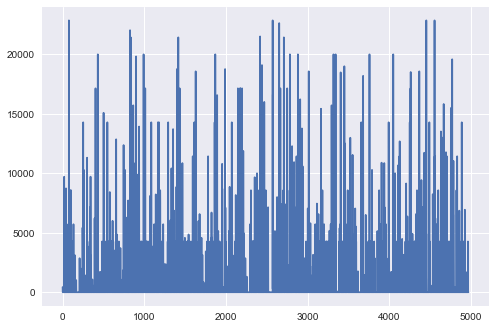

In [32]:
plt.plot(data4["VALOR_03"])

In [33]:
data1.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO,FAIXA_ETARIA
0,780,ANALISTA DE SISTEMAS,M,SO,342.857143,342.857143,428.571429,28.571429,A,1992,30
1,35,SERVIDOR PÚBLICO ESTADUAL,F,SO,942.857143,0.000000,0.000000,0.000000,A,1990,30
2,54,ANALISTA DE SISTEMAS,M,SO,2000.000000,0.000000,0.000000,2857.142857,A,1987,35
3,35,BANCARIO E ECONOMIÁRIO,M,NSO,857.142857,285.714286,0.000000,1428.571429,A,1988,35
4,883,SERVIDOR PÚBLICO MUNICIPAL,M,NSO,8615.385714,0.000000,0.000000,47471.788571,A,1971,40+


# CRIAÇÃO DE VARIÁVEIS DUMMIES

In [34]:
data5 = data4.copy()
data4.head(1)

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO,FAIXA_ETARIA
0,780,ANALISTA DE SISTEMAS,M,SO,342.857143,342.857143,428.571429,28.571429,A,1992,30


In [35]:
base_dummies = data5.copy()
profissao = pd.get_dummies(base_dummies['PROFISSAO'],drop_first=True)
genero = pd.get_dummies(base_dummies['GENERO'],drop_first=True)
estado_civil = pd.get_dummies(base_dummies['ESTADO_CIVIL'],drop_first=True)
perfil = pd.get_dummies(base_dummies['PERFIL'],drop_first=True)
faixaetaria = pd.get_dummies(base_dummies['FAIXA_ETARIA'],drop_first=True)

base_dummies.drop(["PROFISSAO","GENERO","ESTADO_CIVIL","PERFIL","FAIXA_ETARIA"], axis=1,inplace=True)
#base_dummies.drop(["GENERO","ESTADO_CIVIL","PERFIL"], axis=1,inplace=True)
base_dummies = pd.concat([base_dummies,profissao,genero,estado_civil,perfil,faixaetaria],axis=1)
#base_dummies = pd.concat([base_dummies,genero,estado_civil,perfil],axis=1)
base_dummies.head()
data5 = base_dummies.copy()

# NORMALIZAR TODOS OS DADOS

In [36]:
data6 = data5.copy()

In [37]:
# NORMALIZAR VARIÁVEIS VALOR_01,02,03,04

#scaler = preprocessing.StandardScaler().fit(data6["VALOR_01"])
#data6["VALOR_01"] = scaler.transform(data6["VALOR_01"])

#scaler = preprocessing.StandardScaler().fit(data6["VALOR_02"])
#data6["VALOR_02"] = scaler.transform(data6["VALOR_02"])

#scaler = preprocessing.StandardScaler().fit(data6["VALOR_03"])
#data6["VALOR_03"] = scaler.transform(data6["VALOR_03"])

#scaler = preprocessing.StandardScaler().fit(data6["VALOR_04"])
#data6["VALOR_04"] = scaler.transform(data6["VALOR_04"])

# VISUALIZAÇÃO DOS DADOS

In [38]:
data7 = data4.copy()
data7.head(1)

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,ANO,FAIXA_ETARIA
0,780,ANALISTA DE SISTEMAS,M,SO,342.857143,342.857143,428.571429,28.571429,A,1992,30


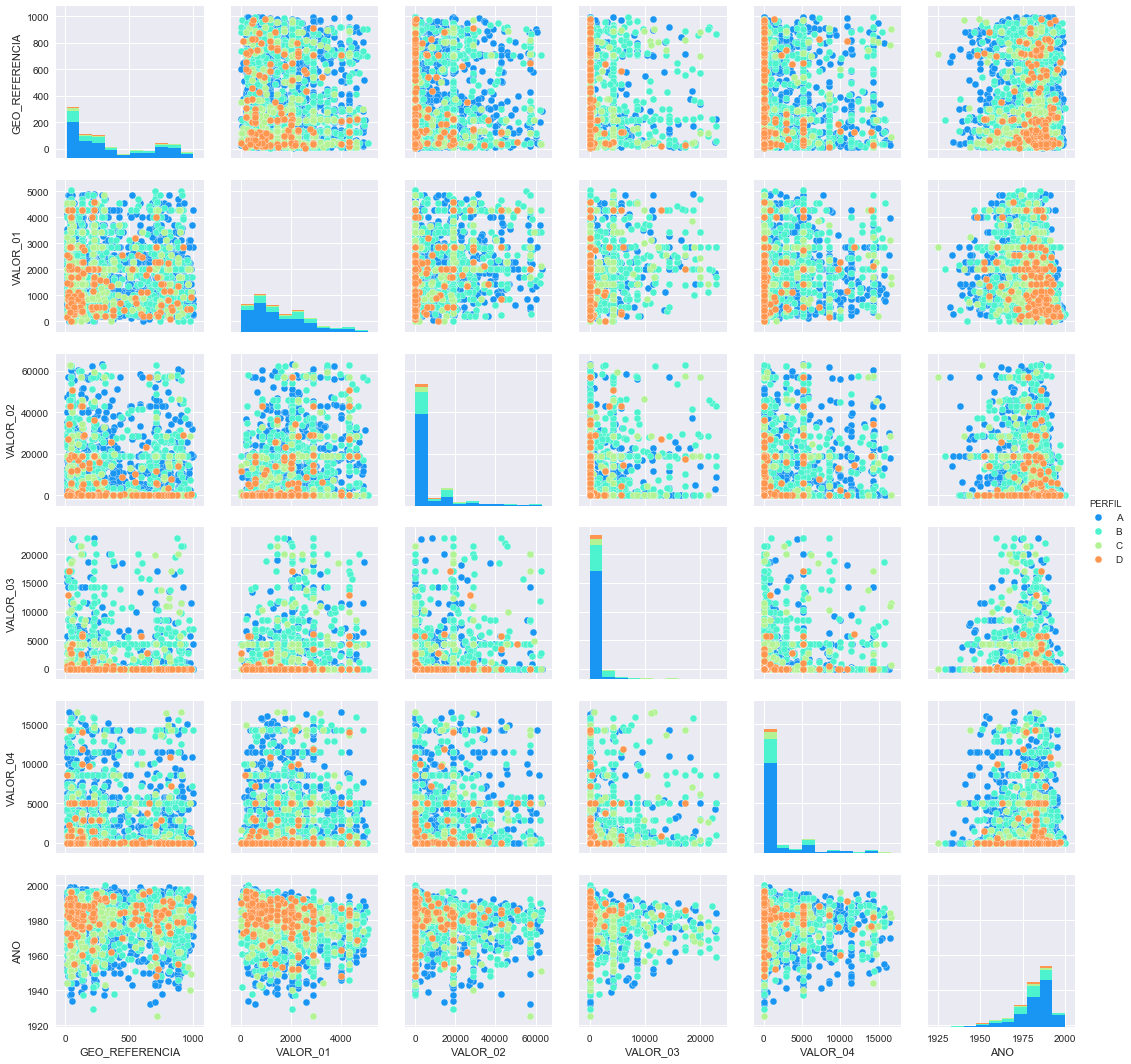

In [39]:
sns.pairplot(data7,hue='PERFIL',palette='rainbow')

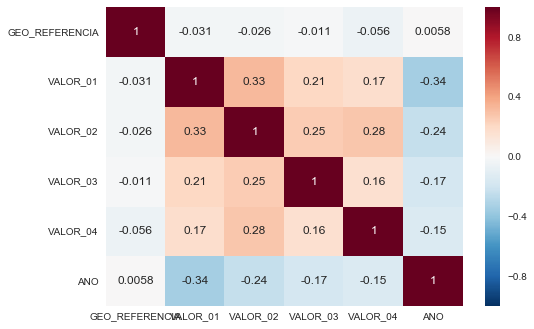

In [40]:
sns.heatmap(data7.corr(),annot=True)

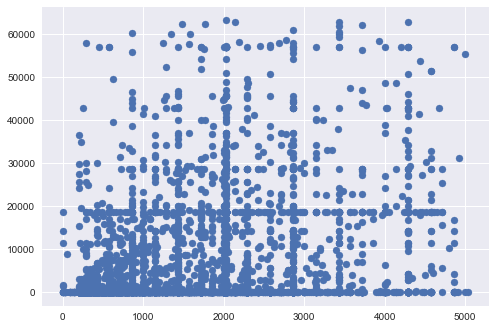

In [41]:
plt.scatter(data7["VALOR_01"],data7["VALOR_02"])

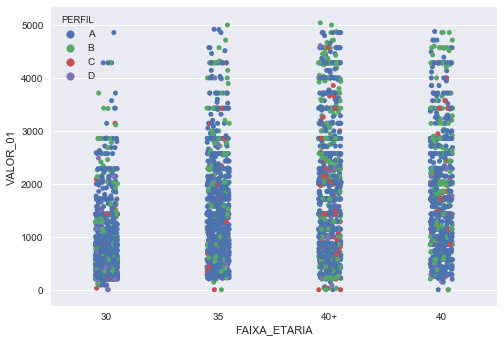

In [42]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_01", hue='PERFIL',data=data7,jitter=True)

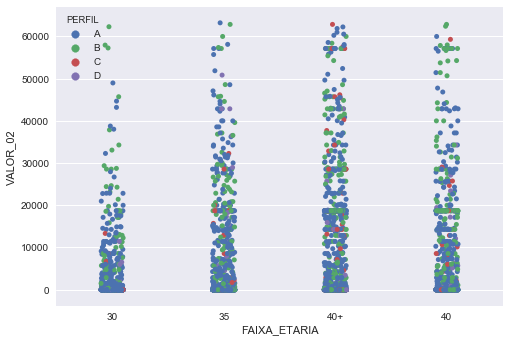

In [43]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_02", hue='PERFIL',data=data7,jitter=True)

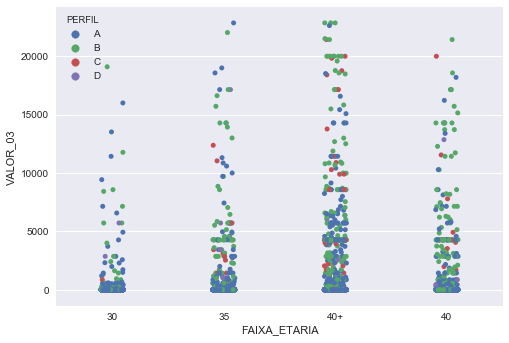

In [44]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_03", hue='PERFIL',data=data7,jitter=True)

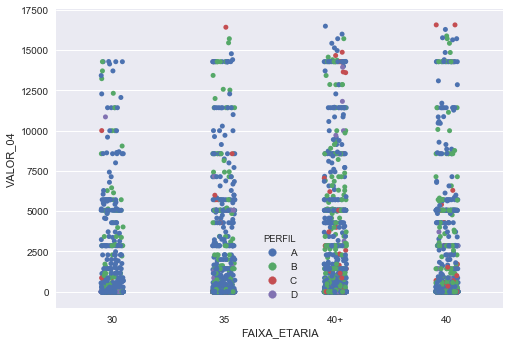

In [45]:
sns.stripplot(x="FAIXA_ETARIA", y="VALOR_04", hue='PERFIL',data=data7,jitter=True)

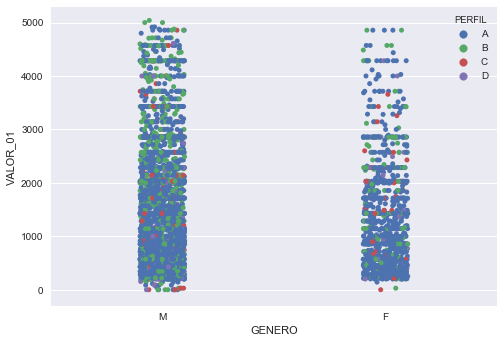

In [46]:
sns.stripplot(x="GENERO", y="VALOR_01", hue='PERFIL',data=data7,jitter=True)

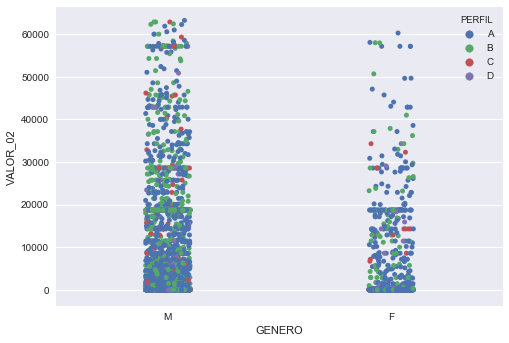

In [47]:
sns.stripplot(x="GENERO", y="VALOR_02", hue='PERFIL',data=data7,jitter=True)

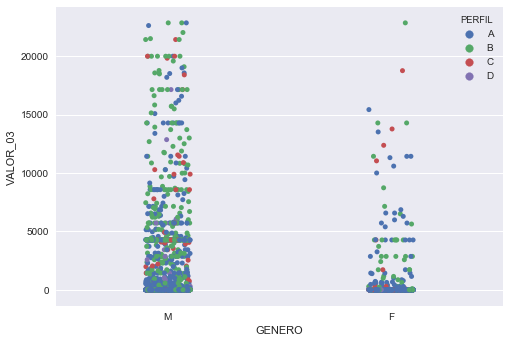

In [48]:
sns.stripplot(x="GENERO", y="VALOR_03", hue='PERFIL',data=data7,jitter=True)

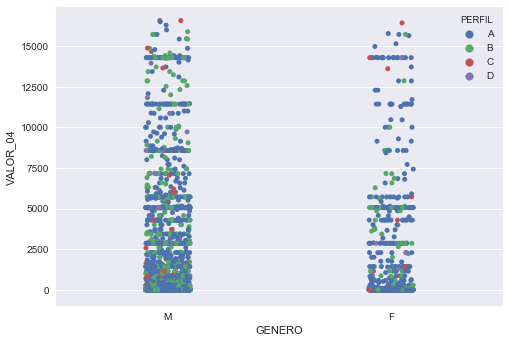

In [49]:
sns.stripplot(x="GENERO", y="VALOR_04", hue='PERFIL',data=data7,jitter=True)

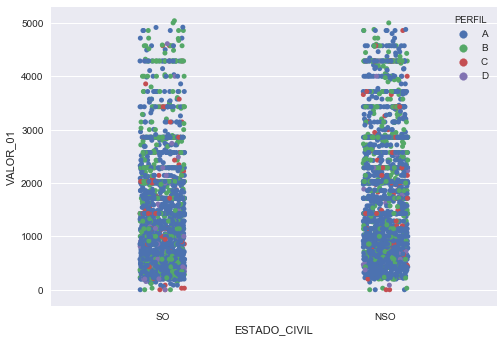

In [50]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_01", hue='PERFIL',data=data7,jitter=True)

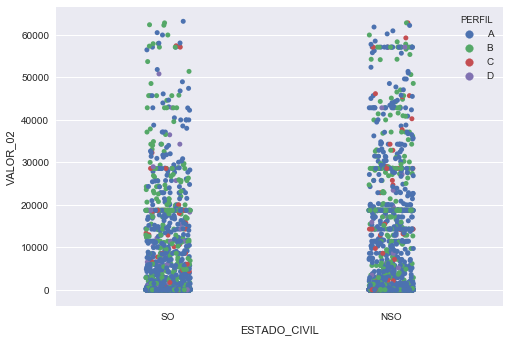

In [51]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_02", hue='PERFIL',data=data7,jitter=True)

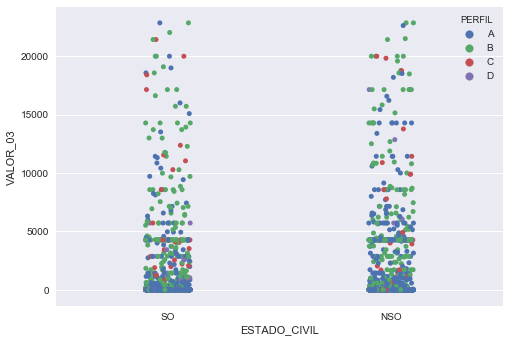

In [52]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_03", hue='PERFIL',data=data7,jitter=True)

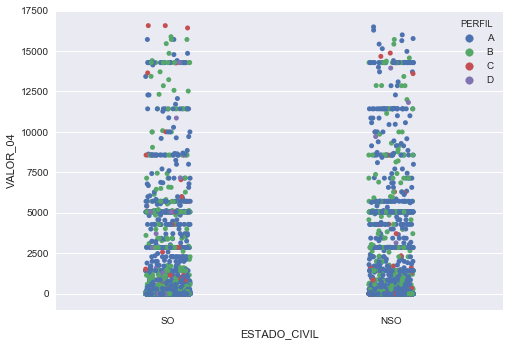

In [53]:
sns.stripplot(x="ESTADO_CIVIL", y="VALOR_04", hue='PERFIL',data=data7,jitter=True)

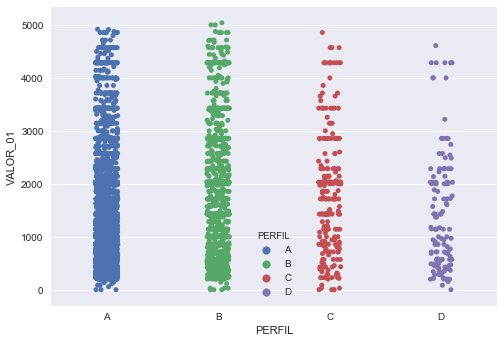

In [54]:
sns.stripplot(x="PERFIL", y="VALOR_01", hue='PERFIL',data=data7,jitter=True)

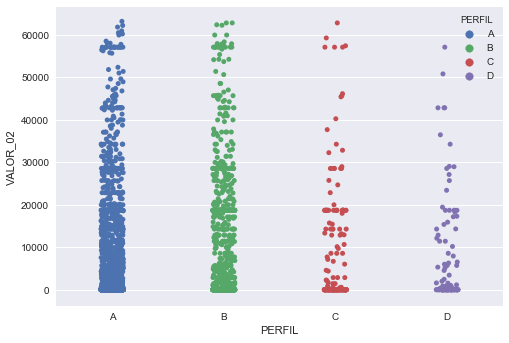

In [55]:
sns.stripplot(x="PERFIL", y="VALOR_02", hue='PERFIL',data=data7,jitter=True)

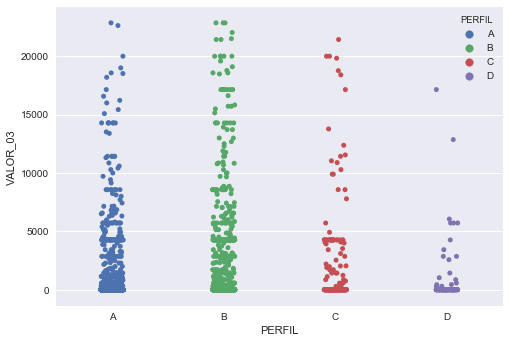

In [56]:
sns.stripplot(x="PERFIL", y="VALOR_03", hue='PERFIL',data=data7,jitter=True)

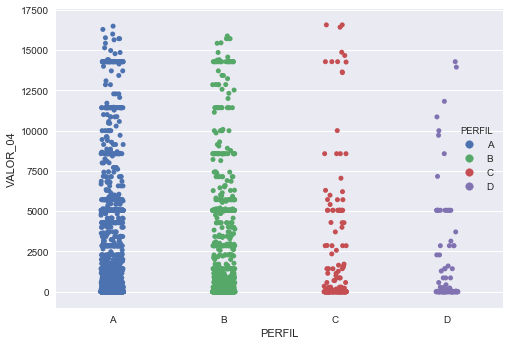

In [57]:
sns.stripplot(x="PERFIL", y="VALOR_04", hue='PERFIL',data=data7,jitter=True)

TypeError: len() of unsized object

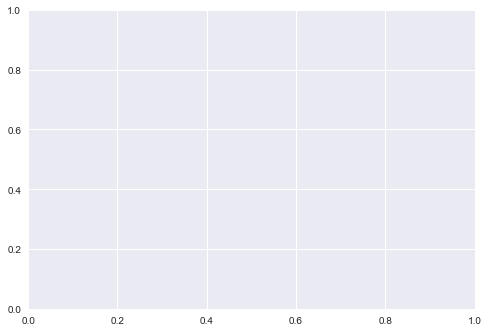

In [58]:
plt.hist(data7["GENERO"])

In [ ]:
plt.hist(data7["ESTADO_CIVIL"])

In [ ]:
plt.hist(data7["FAIXA_ETARIA"])

In [ ]:
plt.hist(data7["PERFIL"])

In [ ]:
data7.head(1)

In [ ]:
# ESTUDO QUANTO A PROFISSÃO DO CLIENTE
#plt.figure(figsize=(10,15))
#sns.heatmap(base_dummies.drop(["GEO_REFERENCIA","VALOR_01","VALOR_02","VALOR_03","VALOR_04","ANO"],axis=1).groupby("PROFISSAO").sum())

In [ ]:
#plt.figure(figsize=(10,15))
#sns.heatmap(base_dummies.drop(["M","SO","B","C","D","ANO"],axis=1).groupby("PROFISSAO").sum())

In [ ]:
# ESTUDO QUANTO A FAIXA ETÁRIA DO CLIENTE
#plt.figure(figsize=(10,5))
#sns.heatmap(base_dummies.drop(["GEO_REFERENCIA","VALOR_01","VALOR_02","VALOR_03","VALOR_04","ANO"],axis=1).groupby("FAIXA_ETARIA").sum())

## DISTRIBUIÇÕES DAS VARIÁVEIS CONTÍNUAS

In [ ]:
sns.distplot(data7["VALOR_01"])

In [ ]:
sns.distplot(data7["VALOR_02"])

In [ ]:
sns.distplot(data7["VALOR_03"])

In [ ]:
sns.distplot(data7["VALOR_04"])

In [ ]:
sns.distplot(data7["GEO_REFERENCIA"])

# APLICAR TÉCNICAS DE MODELAGEM

In [59]:
data7 = data5.copy()

In [60]:
kmeans = KMeans(n_clusters=2)

In [61]:
kmeans.fit(data7)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
kmeans.cluster_centers_

array([[  3.42029026e+02,   1.37331302e+03,   9.32521396e+02,
          4.34208303e+02,   1.11803405e+03,   1.98280944e+03,
          2.29681979e-02,   1.18626956e-01,   1.36294801e-02,
          5.90610803e-02,   5.19939425e-02,   1.99394245e-02,
          1.89298334e-02,   3.30641090e-02,   8.58152448e-02,
          9.28823826e-02,   2.82685512e-02,   2.42301868e-02,
          1.64563352e-01,   1.74154467e-02,   1.46390712e-02,
          4.41696113e-02,   4.56839980e-02,   2.29681979e-02,
          1.61534578e-02,   1.99394245e-02,   7.66279657e-01,
          5.50984351e-01,   1.78445230e-01,   4.51792024e-02,
          2.67541646e-02,   2.69056032e-01,   1.89550732e-01,
          2.39777890e-01],
       [  3.16997976e+02,   2.30373826e+03,   2.61338338e+04,
          2.23219107e+03,   3.37585226e+03,   1.97527429e+03,
          2.83400810e-02,   9.41295547e-02,   3.94736842e-02,
          3.54251012e-02,   9.10931174e-03,   3.44129555e-02,
          1.21457490e-02,   3.34008097e-02,

In [63]:
data7.head(1)

,GEO_REFERENCIA,VALOR_01,VALOR_02,VALOR_03,VALOR_04,ANO,ADVOGADO,ANALISTA DE SISTEMAS,APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO),AUTÔNOMO,...,TÉCNICO DE ELETRICIDADE,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,M,SO,B,C,D,35,40,40+
0,780,342.857143,342.857143,428.571429,28.571429,1992,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0


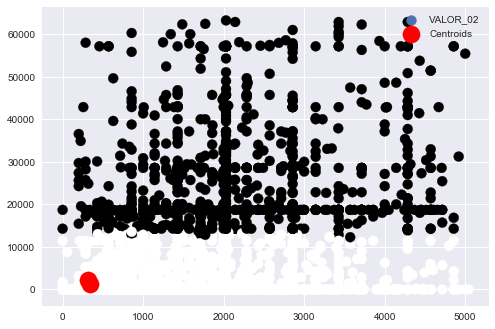

In [64]:
### para visualizar os centroides

plt.scatter(data7["VALOR_01"], data7["VALOR_02"], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.legend()

plt.show()

In [65]:
def escolhe_k(var):
    var

In [66]:
from sklearn.model_selection import train_test_split
X = data7
y = kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions)) 

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      1201
          1       1.00      1.00      1.00       284

avg / total       1.00      1.00      1.00      1485



In [67]:
print(confusion_matrix(y_test,predictions))

[[1200    1]
 [   0  284]]


In [69]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(data7.columns[1:])
features

ImportError: No module named pydot

In [ ]:
dot_data = StringIO()  

In [ ]:
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

In [ ]:
graph = pydot.graph_from_dot_data(dot_data.getvalue())

In [ ]:
Image(graph[0].create_png())

# AVALIAÇÃO DO MODELO